# Pandas and Friends

* Austin Godber
* Mail: godber@uberhip.com
* Twitter: @godber
* Presented at [DesertPy](http://desertpy.com), May 2018.

# What does it do?

Pandas is a Python data analysis tool built on top of NumPy that provides a
suite of data structures and data manipulation functions to work on those data
structures.  It is particularly well suited for working with time series data.

# Getting Started - Installation

Installing with pip or apt-get::

```
pip install pandas
# or
conda install pandas
```

* Mac - Homebrew or MacPorts to get the dependencies, then pip
* Windows - Python(x,y)?
* Commercial Pythons: Anaconda, Canopy

# Getting Started - Dependencies

Dependencies, required, recommended and optional

```
# Required
numpy, python-dateutil, pytx
# Recommended
numexpr, bottleneck
# Optional
cython, scipy, pytables, matplotlib, statsmodels, openpyxl
```

# Pandas' Friends!

Pandas works along side and is built on top of several other Python projects.

* Jupyter/IPython

* Numpy

* Matplotlib

## Pandas gets along with EVERYONE!


<img src='panda-on-a-unicorn.jpg'>

# Background - IPython


IPython is a fancy python console.  Try running ``ipython`` or ``ipython --pylab`` on your command line.  Some IPython tips

```python
# Special commands, 'magic functions', begin with %
%quickref, %who, %run, %reset
# Shell Commands
ls, cd, pwd, mkdir
# Need Help?
help(), help(obj), obj?, function?
# Tab completion of variables, attributes and methods
```

# Background - Jupyter/IPython Notebook

There is a web interface to IPython, known as the Jupyter (IPython) notebook, start it
like this

```
jupyter notebook
# or to get all of the pylab components
jupyter notebook --pylab
```

# Background - NumPy

* NumPy is the foundation for Pandas
* Numerical data structures (mostly Arrays)
* Operations on those.
* Less structure than Pandas provides.

# Background - NumPy - Arrays

In [1]:
import numpy as np
# np.zeros, np.ones
data0 = np.zeros((2, 4))

data0

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [2]:
# Make an array with 20 entries 0..19
data1 = np.arange(20)
# print the first 8
data1[0:8]

array([0, 1, 2, 3, 4, 5, 6, 7])

## Background - NumPy - Arrays

In [3]:
# make it a 4,5 array
data = np.arange(20).reshape(4, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

## Background - NumPy - Arrays

Arrays have NumPy specific types, `dtypes`, and can be operated on.

In [4]:
print("dtype: ", data.dtype)
result = data * 20.5
print(result)
print(result.dtype)

dtype:  int64
[[   0.    20.5   41.    61.5   82. ]
 [ 102.5  123.   143.5  164.   184.5]
 [ 205.   225.5  246.   266.5  287. ]
 [ 307.5  328.   348.5  369.   389.5]]
float64


Now, on to Pandas
-----------------

![](panda-giving-another-panda-a-hand-sm.jpg)

Pandas
------

* Tabular, Timeseries, Matrix Data - labeled or not
* Sensible handling of missing data and data alignment
* Data selection, slicing and reshaping features
* Robust data import utilities.
* Advanced time series capabilities

Data Structures
----------------

* Series - 1D labeled array
* DataFrame - 2D labeled array
* Panel - 3D labeled array (More D)

# Assumed Imports

In my code samples, assume I import the following

In [5]:
import pandas as pd
import numpy as np

# Series

* one-dimensional labeled array
* holds any data type
* axis labels known as index
* implicit integer indexes
* ``dict``-like

# Create a Simple Series

In [6]:
s1 = pd.Series([1, 2, 3, 4, 5])
s1

0    1
1    2
2    3
3    4
4    5
dtype: int64

# Series Operations

In [7]:
# integer multiplication
print(s1 * 5)

0     5
1    10
2    15
3    20
4    25
dtype: int64


# Series Operations - Cont.

In [8]:
# float multiplication
print(s1 * 5.0)

0     5.0
1    10.0
2    15.0
3    20.0
4    25.0
dtype: float64


# Series Index

In [9]:
s2 = pd.Series([1, 2, 3, 4, 5],
               index=['a', 'b', 'c', 'd', 'e'])
s2

a    1
b    2
c    3
d    4
e    5
dtype: int64

# Date Convenience Functions

A quick aside ...

In [10]:
dates = pd.date_range('20180508', periods=5)
print(dates)
print()
print(dates[0])

DatetimeIndex(['2018-05-08', '2018-05-09', '2018-05-10', '2018-05-11',
               '2018-05-12'],
              dtype='datetime64[ns]', freq='D')

2018-05-08 00:00:00


# Datestamps as Index

In [11]:
s3 = pd.Series([1, 2, 3, 4, 5], index=dates)
s3

2018-05-08    1
2018-05-09    2
2018-05-10    3
2018-05-11    4
2018-05-12    5
Freq: D, dtype: int64

# Selecting By Index

Note that the integer index is retained along with the new date index.

In [12]:
print(s3[0], type(s3[0]))
print()
print(s3[1:3])
print()
print(type(s3[1:3]))

1 <class 'numpy.int64'>

2018-05-09    2
2018-05-10    3
Freq: D, dtype: int64

<class 'pandas.core.series.Series'>


# Selecting by value

In [13]:
s3[s3 < 3]

2018-05-08    1
2018-05-09    2
Freq: D, dtype: int64

## Wait!  How did that work?

(Boolean Series)

In [14]:
s3 < 3

2018-05-08     True
2018-05-09     True
2018-05-10    False
2018-05-11    False
2018-05-12    False
Freq: D, dtype: bool

# Selecting by Label (Date)

In [15]:
s3['20180509':'20180511']

2018-05-09    2
2018-05-10    3
2018-05-11    4
Freq: D, dtype: int64

Series Wrapup
-------------

Things not covered but you should look into:

* Other instantiation options: ``dict``
* Operator Handling of missing data ``NaN``
* Reforming Data and Indexes
* Other Series Attributes:

  * ``index`` - ``index.name``
  * ``name`` - Series name

DataFrame
---------

* 2-dimensional labeled data structure
* Like a SQL Table, Spreadsheet or ``dict`` of ``Series`` objects.
* Columns of potentially different types
* Operations, slicing and other behavior just like ``Series``

# DataFrame - Simple

In [16]:
data1 = pd.DataFrame(np.random.rand(4, 4))
data1

,0,1,2,3
0,0.652591,0.977988,0.672492,0.797441
1,0.608224,0.618823,0.066927,0.617655
2,0.032728,0.928986,0.568039,0.830334
3,0.858448,0.586733,0.645037,0.463828


# DataFrame - Index/Column Names

In [17]:
dates = pd.date_range('20180508', periods=4)
data2 = pd.DataFrame(
    np.random.rand(4, 4),
    index=dates, columns=list('ABCD'))
data2

,A,B,C,D
2018-05-08,0.477776,0.591559,0.472501,0.201786
2018-05-09,0.705378,0.669047,0.510145,0.474396
2018-05-10,0.786218,0.443650,0.465601,0.028237
2018-05-11,0.861175,0.953688,0.043908,0.634627


# DataFrame - Operations

In [18]:
data2['E'] = data2['B'] + 5 * data2['C']
data2

,A,B,C,D,E
2018-05-08,0.477776,0.591559,0.472501,0.201786,2.954062
2018-05-09,0.705378,0.669047,0.510145,0.474396,3.219771
2018-05-10,0.786218,0.443650,0.465601,0.028237,2.771655
2018-05-11,0.861175,0.953688,0.043908,0.634627,1.173226


See?  You never need Excel again!

# DataFrame - Column Access

Deleting a column.

In [19]:
# Deleting a Column
del data2['E']
data2

,A,B,C,D
2018-05-08,0.477776,0.591559,0.472501,0.201786
2018-05-09,0.705378,0.669047,0.510145,0.474396
2018-05-10,0.786218,0.443650,0.465601,0.028237
2018-05-11,0.861175,0.953688,0.043908,0.634627


# DataFrame

Remember this, data2, for the next examples.

In [20]:
data2

,A,B,C,D
2018-05-08,0.477776,0.591559,0.472501,0.201786
2018-05-09,0.705378,0.669047,0.510145,0.474396
2018-05-10,0.786218,0.443650,0.465601,0.028237
2018-05-11,0.861175,0.953688,0.043908,0.634627


# DataFrame - Column Access 

As a dict

In [21]:
data2['B']

2018-05-08    0.591559
2018-05-09    0.669047
2018-05-10    0.443650
2018-05-11    0.953688
Freq: D, Name: B, dtype: float64

# DataFrame - Column Access

As an attribute

In [22]:
data2.B

2018-05-08    0.591559
2018-05-09    0.669047
2018-05-10    0.443650
2018-05-11    0.953688
Freq: D, Name: B, dtype: float64

# DataFrame - Row Access

By row label

In [23]:
data2.loc['20180510']

A    0.786218
B    0.443650
C    0.465601
D    0.028237
Name: 2018-05-10 00:00:00, dtype: float64

# DataFrame - Row Access

By integer location   

In [24]:
data2.iloc[1]

A    0.705378
B    0.669047
C    0.510145
D    0.474396
Name: 2018-05-09 00:00:00, dtype: float64

# DataFrame - Cell Access

Access column, then row or use iloc and row/column indexes.

In [25]:
print(data2.B[0])
print(data2['B'][0])
print(data2.loc['20180508'][1])
print(data2.iloc[0,1])  # [row,column] 

0.591559021591
0.591559021591
0.591559021591
0.591559021591


# DataFrame - Taking a Peek

Look at the beginning of the DataFrame

In [26]:
data3 = pd.DataFrame(np.random.rand(100, 4))
data3.head()

,0,1,2,3
0,0.873234,0.099089,0.808360,0.854230
1,0.900437,0.575247,0.703990,0.807440
2,0.811789,0.317346,0.806548,0.690979
3,0.306628,0.807794,0.614721,0.583616
4,0.863193,0.610154,0.357733,0.012957


# DataFrame - Taking a Peek

Look at the end of the DataFrame.

In [27]:
data3.tail()

,0,1,2,3
95,0.350252,0.670472,0.322379,0.307489
96,0.852102,0.939796,0.802812,0.261069
97,0.244884,0.411993,0.326102,0.057981
98,0.912386,0.164428,0.747936,0.423009
99,0.476725,0.067706,0.187584,0.602498


# DataFrame Wrap Up

Just remember, 

* A `DataFrame` is just a bunch of `Series` grouped together.
* Any one dimensional slice returns a `Series`
* Any two dimensional slice returns another `DataFrame`.
* Elements are typically NumPy types or Objects.

# Panel

Like DataFrame but 3 or more dimensions.

# IO Tools

Robust IO tools to read in data from a variety of sources

* CSV - [pd.read_csv()](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)
* Clipboard - [pd.read_clipboard()](http://pandas.pydata.org/pandas-docs/stable/io.html#clipboard)
* SQL - [pd.read_sql_table()](http://pandas.pydata.org/pandas-docs/stable/io.html#sql-queries)
* Excel - [pd.read_excel()](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

# Plotting

* Matplotlib - [s.plot()](http://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-matplotlib) - Standard Python Plotting Library

# Bringing it Together - Data

The csv file (``phx-temps.csv``) contains Phoenix weather data from
GSOD::

```
1973-01-01 00:00:00,53.1,37.9
1973-01-02 00:00:00,57.9,37.0
...
2012-12-30 00:00:00,64.9,39.0
2012-12-31 00:00:00,55.9,41.0
```

# Bringing it Together - Code

Simple `read_csv()`

In [28]:
# simple readcsv
phxtemps1 = pd.read_csv('phx-temps.csv')
phxtemps1.head()

,1973-01-01 00:00:00,53.1,37.9
0,1973-01-02 00:00:00,57.9,37.0
1,1973-01-03 00:00:00,59.0,37.0
2,1973-01-04 00:00:00,57.9,41.0
3,1973-01-05 00:00:00,54.0,39.9
4,1973-01-06 00:00:00,55.9,37.9


# Bringing it Together - Code

Advanced `read_csv()`, parsing the dates and using them as the index, and naming the columns.

In [29]:
# define index, parse dates, name columns
phxtemps2 = pd.read_csv(
    'phx-temps.csv', index_col=0,
    names=['highs', 'lows'], parse_dates=True)
phxtemps2.head()

,highs,lows
1973-01-01,53.1,37.9
1973-01-02,57.9,37.0
1973-01-03,59.0,37.0
1973-01-04,57.9,41.0
1973-01-05,54.0,39.9


# Bringing it Together - Plot

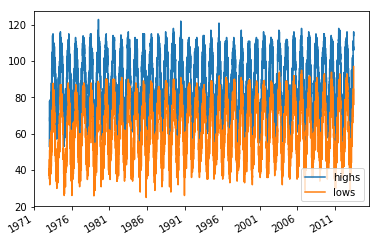

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 
phxtemps2.plot()  # pandas convenience method

Boo, Pandas and Friends would cry if they saw such a plot.

# Bringing it Together - Plot

Lets see a smaller slice of time:

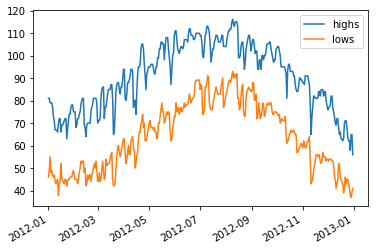

In [31]:
phxtemps2['20120101':'20121231'].plot()


# Bringing it Together - Plot

Lets operate on the `DataFrame` ... lets take the differnce between the highs and lows.

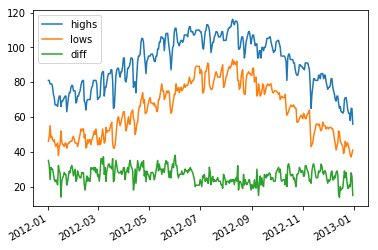

In [32]:
phxtemps2['diff'] = phxtemps2.highs - phxtemps2.lows
phxtemps2['20120101':'20121231'].plot()

References
----------

* [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
* [Python for Data Analysis](http://www.amazon.com/Python-Data-Analysis-Wes-McKinney/dp/1449319793/)
* [Presentation Source](https://github.com/desertpy/presentations)


# Thanks! - Pandas and Friends

* Austin Godber
* Mail: godber@uberhip.com
* Twitter: @godber
* Presented at [DesertPy](http://desertpy.com), May 2018.